In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Pod_Fault_Data_CSV/PF_CPU_Cluster_Vs_Node_Backend.csv')
df.head(10)

CPU_Cluster  CPU_Backend_Node
0      0.00175           0.00149
1      0.00179           0.00151
2      0.00223           0.00150
3      0.42200           0.03240
4      1.70000           0.09790
5      1.70000           0.09770
6      1.69000           0.09870
7      1.68000           0.09720
8      0.00179           0.00147
9      0.00171           0.00146

In [2]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['CPU_Cluster','CPU_Backend_Node'])

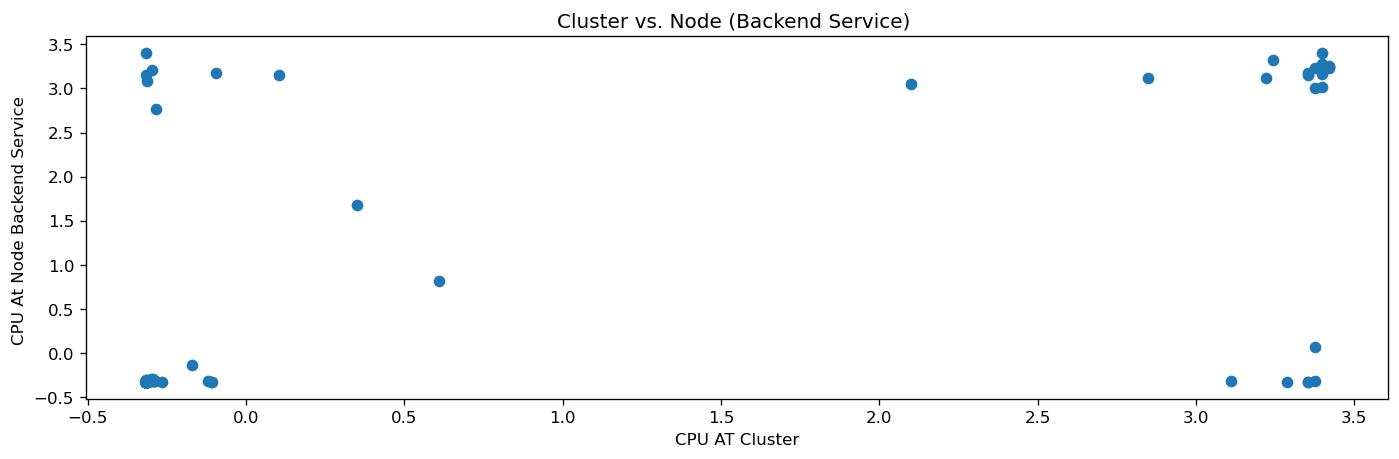

In [3]:
plt.figure(figsize=(14,4))
plt.scatter(df.CPU_Cluster, df.CPU_Backend_Node)
plt.xlabel('CPU AT Cluster')
plt.ylabel('CPU At Node Backend Service ')
plt.title('Cluster vs. Node (Backend Service) ')
plt.show()

In [4]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

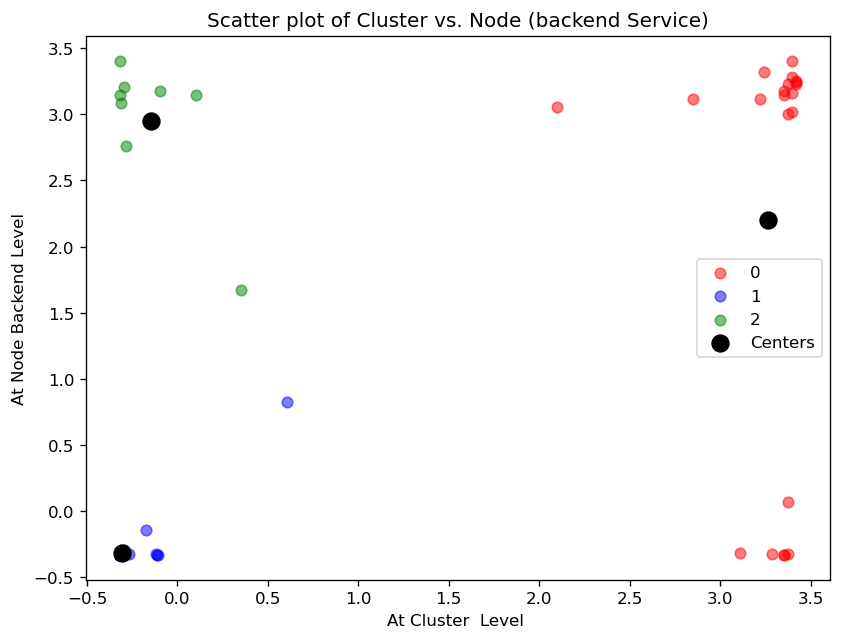

In [5]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Cluster, df[model.labels_==i].CPU_Backend_Node, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Cluster  Level ")
plt.ylabel("At Node Backend Level")
plt.title('Scatter plot of Cluster vs. Node (backend Service)')
plt.legend()
plt.show()

In [6]:
def distance_from_center(CPU_Cluster, CPU_Backend_Node, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Cluster CPU Usage: the standardized CPU Usage of the data point 
    :param float Node Cpu Usage: the standardized cpu at Node of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Cluster_CPU =  model.cluster_centers_[label,0]
    Node_CPU_Backend =  model.cluster_centers_[label,1]
    distance = np.sqrt((CPU_Cluster - Cluster_CPU) ** 2 + (CPU_Backend_Node - Node_CPU_Backend) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.CPU_Cluster, df.CPU_Backend_Node, df.label)

In [8]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     CPU_Cluster  CPU_Backend_Node  label  distance
3       0.608047          0.821740      1      1.46
49      0.350700          1.675183      2      1.37
57      3.397070          3.404331      0      1.21
63      3.375075         -0.321872      0      2.52
65      2.099338          3.055533      0      1.45
66      3.287093         -0.325954      0      2.53
69      3.111129         -0.319275      0      2.52
207     3.375075          0.072195      0      2.13
213     3.353079         -0.328180      0      2.53
216     3.353079         -0.328180      0      2.53


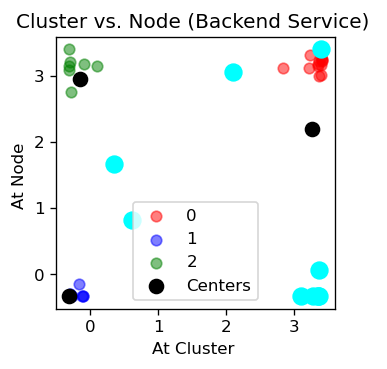

In [12]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].CPU_Cluster, df[model.labels_==i].CPU_Backend_Node, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.CPU_Cluster, outliers.CPU_Backend_Node, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=70)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Cluster ")
plt.ylabel("At Node ")
plt.title('Cluster vs. Node (Backend Service) ')
plt.legend()
plt.show()